In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

plt.rcParams["figure.figsize"] = (8,5)
np.random.seed(42)

print("Setup complete.")


Setup complete.


In [ ]:
df = pd.read_csv("/content/controlled_synthetic_housing.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (8000, 7)


,area_sqft,bedrooms,bathrooms,distance_city_km,age_years,location_score,price
0,1573.8,2,3,0.50,13.8,7,3677778.0
1,1351.6,5,2,7.64,16.5,5,2962167.0
2,1626.7,5,2,9.01,2.8,4,3511495.0
3,1933.1,4,1,14.31,11.8,4,3994347.0
4,1318.0,5,1,3.01,6.1,5,3071694.0


In [ ]:
X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (6000, 6)
Test size: (2000, 6)


In [ ]:
models = {
    "Linear": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),

    "Tree": DecisionTreeRegressor(
        max_depth=6, random_state=42
    ),

    "Forest": RandomForestRegressor(
        n_estimators=200,
        max_depth=8,
        random_state=42
    ),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR(C=50, gamma="scale"))
    ]),

    "NeuralNet": Pipeline([
        ("scaler", StandardScaler()),
        ("model", MLPRegressor(
            hidden_layer_sizes=(32,16),
            max_iter=700,
            random_state=42
        ))
    ]),

    "Bayesian": Pipeline([
        ("scaler", StandardScaler()),
        ("model", BayesianRidge())
    ])
}

print("Models ready.")


Models ready.


In [ ]:
predictions = {}
metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    predictions[name] = y_pred

    metrics[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": root_mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

metrics_df = pd.DataFrame(metrics).T
metrics_df


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


,MAE,RMSE,R2
Linear,98480.630260,122441.354057,0.969818
Tree,136955.919714,170790.292950,0.941276
Forest,111919.628631,138593.714975,0.961330
SVM,551897.472486,692920.738151,0.033379
NeuralNet,278824.542232,360897.810207,0.737785
Bayesian,98481.404472,122441.650267,0.969818


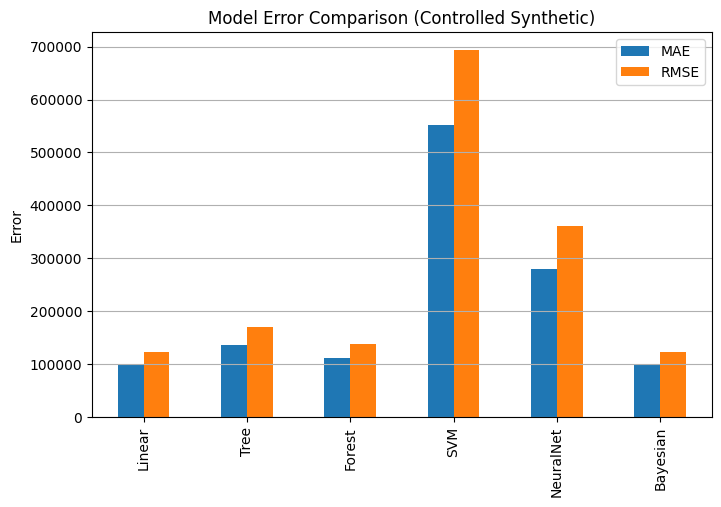

In [ ]:
metrics_df[["MAE","RMSE"]].plot(kind="bar")
plt.title("Model Error Comparison (Controlled Synthetic)")
plt.ylabel("Error")
plt.grid(axis="y")
plt.show()


In [ ]:
pred_matrix = np.vstack(list(predictions.values()))
disagreement = np.var(pred_matrix, axis=0)

print("Disagreement computed.")


Disagreement computed.


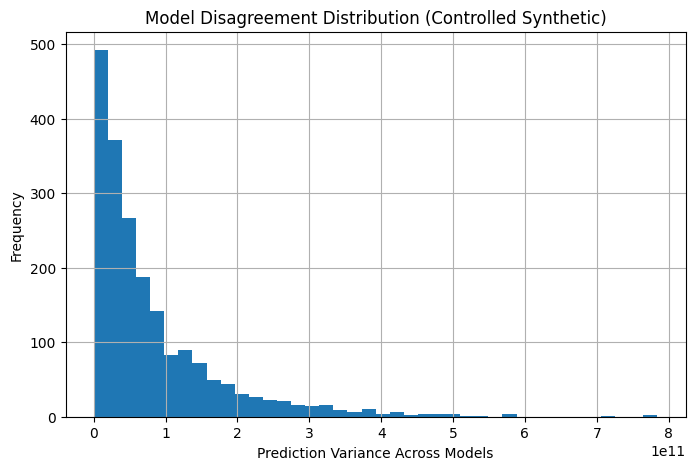

In [ ]:
plt.hist(disagreement, bins=40)
plt.xlabel("Prediction Variance Across Models")
plt.ylabel("Frequency")
plt.title("Model Disagreement Distribution (Controlled Synthetic)")
plt.grid()
plt.show()


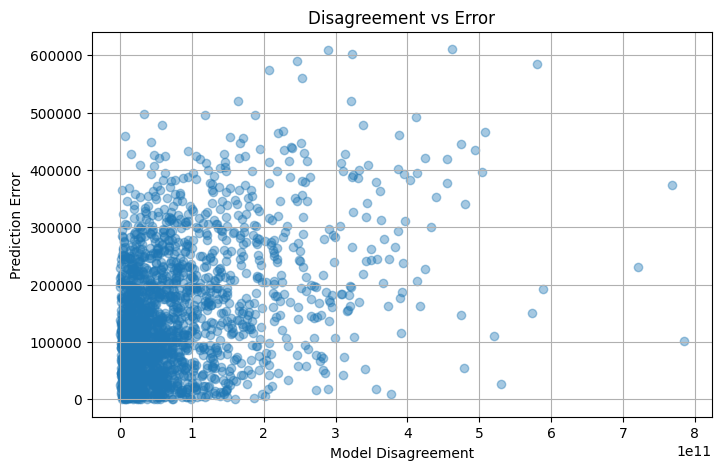

In [ ]:
avg_prediction = np.mean(pred_matrix, axis=0)
absolute_error = np.abs(avg_prediction - y_test.values)

plt.scatter(disagreement, absolute_error, alpha=0.4)
plt.xlabel("Model Disagreement")
plt.ylabel("Prediction Error")
plt.title("Disagreement vs Error")
plt.grid()
plt.show()


In [ ]:
top_idx = np.argsort(disagreement)[-5:]

print("Top 5 High-Disagreement Samples:\n")
for idx in top_idx:
    print("True Price:", round(y_test.values[idx],2))
    for i, model_name in enumerate(predictions.keys()):
        print(f"  {model_name}: {round(pred_matrix[i, idx],2)}")
    print("-"*45)


Top 5 High-Disagreement Samples:

True Price: 1118489.0
  Linear: 1119693.5
  Tree: 1321089.38
  Forest: 1191187.24
  SVM: 3097594.17
  NeuralNet: 2369978.65
  Bayesian: 1119755.82
---------------------------------------------
True Price: 5017463.0
  Linear: 5138608.74
  Tree: 5161068.93
  Forest: 5060179.17
  SVM: 3119955.52
  NeuralNet: 5330681.82
  Bayesian: 5138547.11
---------------------------------------------
True Price: 5172217.0
  Linear: 5151778.73
  Tree: 5161068.93
  Forest: 5255465.19
  SVM: 3116606.19
  NeuralNet: 5813736.59
  Bayesian: 5151715.42
---------------------------------------------
True Price: 5390105.0
  Linear: 5345942.6
  Tree: 5161068.93
  Forest: 5265121.53
  SVM: 3119720.24
  NeuralNet: 5862229.91
  Bayesian: 5345873.7
---------------------------------------------
True Price: 5119517.0
  Linear: 5292747.26
  Tree: 5161068.93
  Forest: 5311515.58
  SVM: 3118932.2
  NeuralNet: 5936012.38
  Bayesian: 5292680.19
---------------------------------------------
